<h1> Genetic Frustration </h1>

This notebook runs the genetic frustration simulation that seeks a highly degenerate spin model close
to a given microscopic spin model by creating Hamiltonian "species" that begin as a random collection but then 
evolve over time to become more degenerate and closer to the microscopic Hamiltonian. 

<h2> Setup path and current directory </h2>
Change to current directory, alter LOAD_PATH to look here, etc

In [1]:
push!(LOAD_PATH,".")

3-element Array{ByteString,1}:
 "/Applications/Julia-0.4.2.app/Contents/Resources/julia/local/share/julia/site/v0.4"
 "/Applications/Julia-0.4.2.app/Contents/Resources/julia/share/julia/site/v0.4"      
 "."                                                                                 

In [18]:
workspace()

<h2> Import modules </h2>

In [2]:
using PyPlot

In [3]:
using Graphs

In [4]:
using GraphPlot

In [5]:
using kagome

<h2> Test the graphing capabilities</h2>

In [6]:
microHam=Ham(asymTerms,asymJ)

1.0 1.0 1.0 1.0 1.0 1.0 0.2 0.2 0.2 0.2 0.2 0.2 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.01

In [7]:
nnHam=Ham(asymTerms,nnJ)

1.0 1.0 1.0 1.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0

In [8]:
ddHam=Ham(asymTerms,ddJ)

1.0 1.0 1.0 1.0 1.0 1.0 0.2 0.2 0.2 0.2 0.2 0.2 0.0 0.0 0.0 0.2 0.2 0.2 0.2 0.2 0.2

In [9]:
Fitness([nnHam,ddHam],microHam)

2-element Array{Float64,1}:
 111.003
 157.861

In [10]:
kagome.LowDOS(ddHam)

119

In [11]:
g,x,y,v,J = tograph(ddHam);

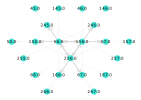

In [12]:
gplot(g,x,y,nodelabel=v,edgelinewidth=J)

In [16]:
lam=Bands(nnHam);

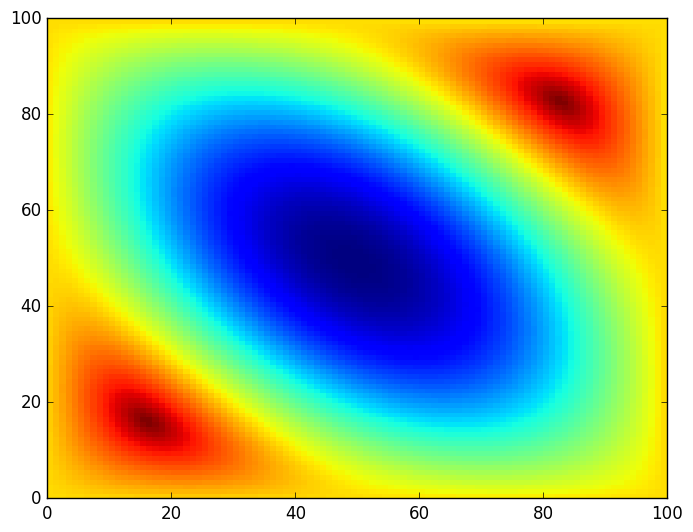

PyObject <matplotlib.collections.PolyCollection object at 0x318c8b978>

In [17]:
PyPlot.pcolor(slice(lam,2,:,:))

In [15]:
[(minimum(lam[i,:,:]),maximum(lam[i,:,:])) for i in 1:3]

3-element Array{Tuple{Any,Any},1}:
 (0.0,7.093091546216276e-16)               
 (3.08395284618099e-16,0.24395488341265956)
 (0.25611910067818255,1.0)                 

In [18]:
[(minimum(lam[i,:,:]),maximum(lam[i,:,:])) for i in 1:3]

3-element Array{Tuple{Any,Any},1}:
 (0.0,8.141635513917812e-16)               
 (3.700743415417187e-16,0.4939178913672387)
 (0.5060821086327617,1.0)                  

<h2> Genetic frustration simulation </h2>

Now lets run our genetic frustration simulation and use the above to plot the results

In [10]:
igen = Initialization();

In [27]:
gen,stats = GeneticAlgorithm(gen, microHam,stats);

0.0 Div: 1, Ave: 79.49689732091298, Best: 92.71392272524446
0.0 Div: 1, Ave: 81.12447808370935, Best: 92.80386410923798
0.0 Div: 2, Ave: 79.7985721912873, Best: 92.83443233069649
0.0 Div: 1, Ave: 84.57643171668485, Best: 92.412197973693
0.0 Div: 1, Ave: 82.50970996435099, Best: 92.412197973693
1.0 Div: 1, Ave: 79.51767778043808, Best: 92.54159810671776
1.0 Div: 2, Ave: 80.39251713831399, Best: 92.54159810671776
1.0 Div: 1, Ave: 79.84667236248819, Best: 92.54631428827649
1.0 Div: 1, Ave: 81.54855246780028, Best: 92.56157148913053
1.0 Div: 2, Ave: 81.83433682244646, Best: 94.39988765376428
1.0 Div: 1, Ave: 80.2593440011325, Best: 92.58763853987737
1.0 Div: 2, Ave: 80.16147784694225, Best: 92.54478311053734
2.0 Div: 1, Ave: 78.98881412966087, Best: 92.52443358436582
2.0 Div: 1, Ave: 78.9707774958348, Best: 92.71474538358731
2.0 Div: 2, Ave: 78.17505657239474, Best: 92.86442047551441
2.0 Div: 1, Ave: 82.67362825909004, Best: 92.74774546668705
2.0 Div: 1, Ave: 76.15083682445481, Best: 92.54

In [12]:
f=Fitness(gen,microHam);

In [13]:
b=findfirst(f,maximum(f))

32

In [14]:
m=findfirst(f,minimum(f))

90

In [15]:
maximum(f)

80.29849895919862

In [16]:
gen[b]

0.48 0.36 0.55 1.32 0.64 0.73 -0.00 0.07 0.33 -0.31 0.02 0.0 -0.43 -0.00 0.38 -0.08 0.36 0.19 0.0 -0.03 -0.25

In [17]:
g,x,y,v,J = tograph(gen[b]);

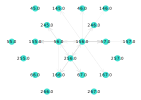

In [18]:
gplot(g,x,y,nodelabel=v,edgelinewidth=J)

In [20]:
lam=Bands(gen[m]);

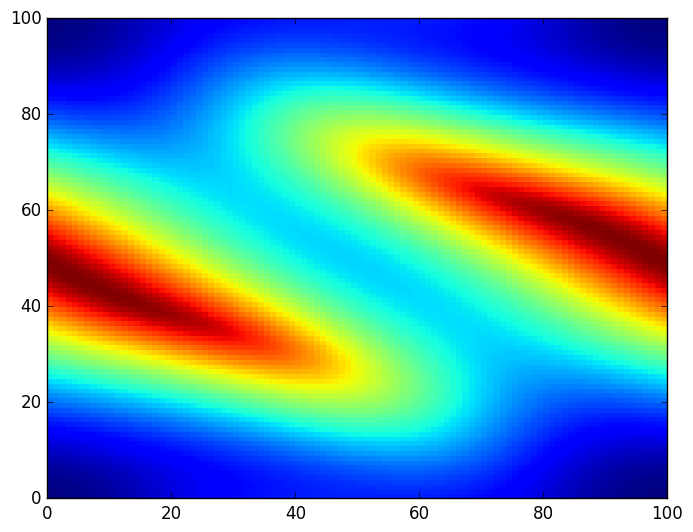

PyObject <matplotlib.collections.PolyCollection object at 0x31777a978>

In [21]:
PyPlot.pcolor(slice(lam,1,:,:))

In [25]:
maximum(slice(lam,1,:,:)),minimum(lam)

(0.32453046324121815,0.0)